# Day2: **1:1 문의 내용 기반 문의유형 자동 분류 모델링**

* [미션0] 오늘의 목표
* [미션1] 개발환경 설정하기
* [미션2] 코드 유형 문의내용 분리하기
* [미션3] 워드클라우드 생성하기1
* [미션4] 데이터 전처리하기
* [미션5] 워드클라우드 생성하기2
* [미션6] 교육 개선점 찾기
* <도전미션> 문의유형 별 워드클라우드 생성 및 분야별 개선점 찾기

----------


### <span style="color:green;background-color:#fff5b1">[미션0] 오늘의 목표: </span><span style="color:red;background-color:#fff5b1">중요 키워드 시각화 및 교육 개선 인사이트 도출</span>

* 1:1 질문들 속에서 중요한 키워드를 찾아 교육에 반영하는 일은 교육 개발에 중요한 일 입니다.
* 그러나 수많은 설문조사에서 중요한 키워드를 수기로 찾아내는 일은 많은 리소스와 시간이 필요 합니다.
* 오늘의 미션을 통해 자연어 데이터를 시각화하여 그 속에서 중요한 키워드를 도출하고 어느 부분에 개선이 필요한지 인사이트를 도출해 주세요.


----------

### <span style="color:green;background-color:#fff5b1">[미션1] 개발환경 설정하기</span>

자연어 데이터에서 중요 키워드를 도출하기 위해 개발환경을 설정하고 데이터를 정리 합니다.
* 필요 라이브러리를 호출하기
* 데이터 파일 불러오기
* 데이터셋 합치기
* 불필요 컬럼 삭제하기
* '\n'(줄바꿈문자 또는 개행문자) 삭제하기




In [94]:
# 필요 라이브러리를 호출하기
## 필요한 라이브러리는 추가로 불러 오세요.
## 프로젝트를 진행하며 필요한 라이브러리는 추가로 설치 하세요.

import pandas as pd    # pandas 데이터프레임을 생성/편집하기 위해 사용 합니다.
import numpy as np    # numpy 행렬을 생성/편집하기 위해 사용 합니다.
import matplotlib.pyplot as plt    # 데이터를 각종 차트로 시각화하기 위해 사용 합니다.
from wordcloud import WordCloud    # 워드 클라우드를 생성하기 위해 사용 합니다.
from collections import Counter    # 단어의 수를 카운트하기 위해 사용 합니다.
import re    # 정규표현식을 사용하기 위해 사용 합니다.
from PIL import Image # 이미지를 로드 할때 사용합니다.


font_path = 'malgun.ttf' # 워드클라우드 한글 폰트 사용


plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False




In [95]:
# 데이터 파일 불러오기
## 'QnA_train_data.csv' 파일 불러와 train_df 변수에 할당 합니다.
## 'QnA_test_data.csv' 파일 불러와 test_df 변수에 할당 합니다.

train_df = pd.read_csv('QnA_train_data.csv')

test_df = pd.read_csv('QnA_test_data.csv')



In [96]:
train_df.shape, test_df.shape

((3032, 4), (758, 4))

In [97]:
# 데이터셋 합치기
## train_df 데이터와 test_df 데이터를 합쳐서 하나의 데이터셋으로 만들어 줍니다.
## 합쳐진 데이터를 data 변수에 할당하고 인덱스를 reset 합니다.

data = pd.concat([train_df, test_df], axis = 0)

data = data.reset_index(drop = True)

data

,트랙,지역,문의내용,문의유형
0,DX컨설턴트,수도권,"inplace= True 를 사용하는 기준이 존재하는 것인지, 아니면 함수나 메소드...",코드2
1,AI개발자,수도권,참조파일2에 대한 (yolo부분) 답안 파일이 올라오지 않은 것 같습니다!,시스템 운영
2,AI개발자,전남/전북,"AICE 시험 관련하여 이렇게 1대1로 질문하는게 맞나요..?\n맞다면, 질문드립니...",시스템 운영
3,DX컨설턴트,충남/충북,예제는 잘 작동한 것 같은데 채점하니 케이스 1만 성공하고 나머지가 fail이 떠 ...,코드1
4,DX컨설턴트,대구/경북,제주관광공사를 대상으로 관광지 순환 버스 솔루션을 도입하여\n운전을 못하는 관광객 ...,이론
...,...,...,...,...
3785,DX컨설턴트,대구/경북,"어디가 잘못되었는지 모르겠어요ㅜㅜ\n\nN = list(map(int, input(...",코드1
3786,DX컨설턴트,수도권,실습교안 102 쪽 진행중인데 이전단계에서 실습 교안대로 진행했는데 사진처럼 나옵니...,웹
3787,AI개발자,충남/충북,ubuntu 파일 이 안 열립니다,웹
3788,DX컨설턴트,수도권,4. 데이터 분석 항복에 있는 6개의 문제에 대한 코드와 그래프 확인 부탁드립니다....,코드2


In [98]:
# 불필요 컬럼 삭제하기
## drop 함수를 사용하여 필요없는 컬럼을 삭제 합니다.
## 삭제할 컬럼: ['트랙', '지역']

data = data.drop(['트랙', '지역'], axis = 1)

data

,문의내용,문의유형
0,"inplace= True 를 사용하는 기준이 존재하는 것인지, 아니면 함수나 메소드...",코드2
1,참조파일2에 대한 (yolo부분) 답안 파일이 올라오지 않은 것 같습니다!,시스템 운영
2,"AICE 시험 관련하여 이렇게 1대1로 질문하는게 맞나요..?\n맞다면, 질문드립니...",시스템 운영
3,예제는 잘 작동한 것 같은데 채점하니 케이스 1만 성공하고 나머지가 fail이 떠 ...,코드1
4,제주관광공사를 대상으로 관광지 순환 버스 솔루션을 도입하여\n운전을 못하는 관광객 ...,이론
...,...,...
3785,"어디가 잘못되었는지 모르겠어요ㅜㅜ\n\nN = list(map(int, input(...",코드1
3786,실습교안 102 쪽 진행중인데 이전단계에서 실습 교안대로 진행했는데 사진처럼 나옵니...,웹
3787,ubuntu 파일 이 안 열립니다,웹
3788,4. 데이터 분석 항복에 있는 6개의 문제에 대한 코드와 그래프 확인 부탁드립니다....,코드2


In [99]:
# '\n'(줄바꿈문자 또는 개행문자) 삭제하기
## 줄바꿈문자는 워드클라우드에서 에러를 일으켜 삭제 해야 합니다.
## 반복문을 사용하여 data['문의내용']의 각 열에서 '\n'을 ' '으로 변경 한 후
## 다시 data['문의내용']에 넣어 줍니다.

for i in range(data.shape[0]):
        data['문의내용'].loc[i] = data['문의내용'].loc[i].replace('\n', ' ')

data

,문의내용,문의유형
0,"inplace= True 를 사용하는 기준이 존재하는 것인지, 아니면 함수나 메소드...",코드2
1,참조파일2에 대한 (yolo부분) 답안 파일이 올라오지 않은 것 같습니다!,시스템 운영
2,"AICE 시험 관련하여 이렇게 1대1로 질문하는게 맞나요..? 맞다면, 질문드립니다...",시스템 운영
3,예제는 잘 작동한 것 같은데 채점하니 케이스 1만 성공하고 나머지가 fail이 떠 ...,코드1
4,제주관광공사를 대상으로 관광지 순환 버스 솔루션을 도입하여 운전을 못하는 관광객 유...,이론
...,...,...
3785,"어디가 잘못되었는지 모르겠어요ㅜㅜ N = list(map(int, input()....",코드1
3786,실습교안 102 쪽 진행중인데 이전단계에서 실습 교안대로 진행했는데 사진처럼 나옵니...,웹
3787,ubuntu 파일 이 안 열립니다,웹
3788,4. 데이터 분석 항복에 있는 6개의 문제에 대한 코드와 그래프 확인 부탁드립니다....,코드2


### <span style="color:green;background-color:#fff5b1"> [미션2] 코드 유형 문의내용 분리하기</span>

가장 질문이 많은 코드1과 코드2의 내용을 워드클라우드로 시각화하기위해 코드 데이터만 따로 분리 합니다.

* data['문의유형'] 이 코드1, 코드2 데이터 분리하기
* 단어 리스트 생성하기
* 전체 단어 빈도수 카운트하기



In [100]:
# data['문의유형'] 이 코드1, 코드2 데이터 분리하기
## data['문의유형'] 열의 값이(유형이) 코드1, 코드2 인 행의 data['문의내용'] 을 담을 type_questions 변수를 pd.Series 타입으로 생성하고 초기화 합니다.
## 반복문을 사용하여 data['문의유형'] 열의 값이(유형이) '코드1', '코드2' 인 값을 type_questions 변수에 할당 합니다.

type_questions = pd.Series()

# for i in data.index:
type_questions = data.loc[data['문의유형'].isin(['코드1', '코드2']), '문의내용']

type_questions

C:\Users\user\AppData\Local\Temp\ipykernel_5332\2620783162.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  type_questions = pd.Series()


0       inplace= True 를 사용하는 기준이 존재하는 것인지, 아니면 함수나 메소드...
3       예제는 잘 작동한 것 같은데 채점하니 케이스 1만 성공하고 나머지가 fail이 떠 ...
9       실습 내용중 오존 변수의 결측치를 다른 값으로 바꿔서 처리할려고 했습니다, targ...
15      오존 이변량 분석 중입니다 spst.pearsonr(bike['ozone'],bik...
20      seoul_drop=seoul_moving.loc[(seoul_moving['도착시...
                              ...                        
3782    3번 문제에서 - 외국인 정보가 1981 ~ 1984년이 누락되어 결측치가 발생할 ...
3783    bins = [0,30, 80, 150, 160]         trindata['...
3785    어디가 잘못되었는지 모르겠어요ㅜㅜ  N = list(map(int, input()....
3788    4. 데이터 분석 항복에 있는 6개의 문제에 대한 코드와 그래프 확인 부탁드립니다....
3789    img_list는 train의 jpg 리스트  for i in img_list:  ...
Name: 문의내용, Length: 1611, dtype: object

In [101]:
# 단어 리스트 생성하기
## 각 문의에서 단어를 분리해서 담을 word_list 변수를 리스트 타입으로 생성 합니다.
## 반복문을 사용하여 type_questions 데이터의 각 행의 문장이 단어의 모음이 되도록 띄어쓰기(' ') 기준으로 split 합니다.
## 각 행에서 분리된 단어들을 다시 반복문을 이용해 word_list 변수에 단어를 한개씩 append 해 줍니다.
## 단어별 빈도수 체크를 위해 최종 word_list 의 차원이 1차원 인지 확인 합니다.
## [TIP] 이중 반복문을 사용하면 쉽게 단어를 분리하고 모을 수 있습니다.


word_list = []

for sent in type_questions:
    for i in range(len(sent.split())):
        word_list.append(sent.split()[i])


len(word_list), word_list

(69704,
 ['inplace=',
  'True',
  '를',
  '사용하는',
  '기준이',
  '존재하는',
  '것인지,',
  '아니면',
  '함수나',
  '메소드에',
  '따라',
  '외워야하는',
  '것인지',
  '궁금합니다.',
  '또한',
  'inplace를',
  '사용해야',
  '하는',
  '대표적인',
  '함수나',
  '메소드들이',
  '궁금합니다.',
  '예제는',
  '잘',
  '작동한',
  '것',
  '같은데',
  '채점하니',
  '케이스',
  '1만',
  '성공하고',
  '나머지가',
  'fail이',
  '떠',
  '실패했습니다.',
  '제가',
  '어디서',
  '틀렸는지',
  '잘',
  '모르겠습니다.',
  '아니면',
  '제가',
  '한',
  '방법',
  '말고',
  '더',
  '좋은',
  '방법이',
  '있을까요?',
  '실습',
  '내용중',
  '오존',
  '변수의',
  '결측치를',
  '다른',
  '값으로',
  '바꿔서',
  '처리할려고',
  '했습니다,',
  'target1',
  '=',
  "'ozone'",
  'temp',
  '=',
  'tr_abc[target1]',
  'temp=temp.fillna(0.000)',
  'temp.unique()',
  '위와',
  '같은',
  '코드로',
  '결측치를',
  '바꿨고',
  '유니크',
  '메소드에서',
  '정상적으로',
  '0으로',
  '표시되면서',
  '바뀌는',
  '것을',
  '확인했습니다.',
  '그러나',
  '이후',
  '다시',
  '유니크',
  '메소드를',
  '실행했더니',
  '결측치가',
  '0으로',
  '바뀌지',
  '않고',
  'nan',
  '값으로',
  '표기되어서',
  '나와',
  '있습니다.',
  '어디서',
  '잘못된건지',
  '알려주실',
  '수',
  '있을까요?',
  '오존',


In [102]:
# 전체 단어 빈도수 카운트하기
## Counter 함수를 사용하여 word_list 변수에 포함된 각 단어의 빈도수를 산출하여 word_count에 할당 합니다.
from collections import Counter

word_count = Counter(word_list)

word_count

Counter({'inplace=': 1,
         'True': 22,
         '를': 72,
         '사용하는': 14,
         '기준이': 7,
         '존재하는': 6,
         '것인지,': 7,
         '아니면': 70,
         '함수나': 2,
         '메소드에': 2,
         '따라': 19,
         '외워야하는': 1,
         '것인지': 33,
         '궁금합니다.': 107,
         '또한': 27,
         'inplace를': 3,
         '사용해야': 9,
         '하는': 82,
         '대표적인': 1,
         '메소드들이': 2,
         '예제는': 1,
         '잘': 135,
         '작동한': 1,
         '것': 124,
         '같은데': 49,
         '채점하니': 1,
         '케이스': 54,
         '1만': 2,
         '성공하고': 2,
         '나머지가': 3,
         'fail이': 29,
         '떠': 3,
         '실패했습니다.': 2,
         '제가': 154,
         '어디서': 12,
         '틀렸는지': 4,
         '모르겠습니다.': 51,
         '한': 85,
         '방법': 16,
         '말고': 10,
         '더': 38,
         '좋은': 19,
         '방법이': 57,
         '있을까요?': 111,
         '실습': 55,
         '내용중': 2,
         '오존': 2,
         '변수의': 5,
         '결측치를': 16,
         '다른': 75,


### <span style="color:green;background-color:#fff5b1"> [미션3]워드클라우드 생성하기1</span>

1:1 문의에서 반복되는 키워드를 파악하기 위하여 워드클라우드를 생성하고 단어별 빈도수를 체크 합니다.<br>
모든 데이터를 한 문단으로 합쳐서 워드클라우드를 생성 할 수도 있지만, 미프4-1차 에서는 단어별 빈도수를 활용하여 워드클라우드를 생성 합니다.<br>
생성된 워드클라우드에서 교육생들이 어려워 하는 부분이 무엇인지 생각해 보세요.
* 워드클라우드 생성하기
* 단어별 빈도수로 정렬하기

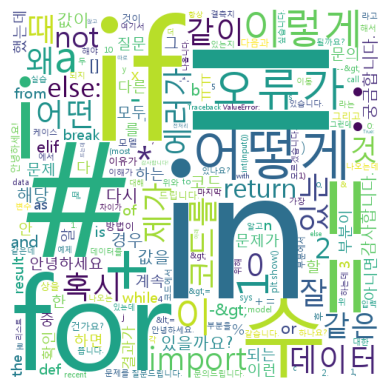

In [103]:
# 워드클라우드 생성하기
## 각 단어의 빈도수가 저장되어 있는 word_count 변수로 워드클라우드를 생성합니다.
## 높이, 넓이, 색상 등 생성하는 워드클라우드의 파라미터를 알맞게 조절 합니다.
## 워드클라우드 생성 매서드는 .generate_from_frequencies 를 사용합니다.
## [tip] 한 문단으로 워드클라우드로 만들때는 generate 매서드 사용
## [tip] 단어와 빈도수를 가지고 워드클라우드를 만들때는 generate_from_frequencies 매서드 사용
from wordcloud import WordCloud

origin_cloud = WordCloud(font_path = 'malgun.ttf',
                        width = 500,
                        height = 500,
                        background_color = 'white').generate_from_frequencies(word_count)

plt.axis('off')
plt.imshow(origin_cloud)

In [104]:
# 단어별 빈도수로 정렬하기
## Counter 함수의 .most_common 매서드를 사용하여 word_count에 저장된 단어의 빈도수를 내림차순으로 출력 합니다.
## 가장 많이 사용된 단어들이 무엇인지 확인 합니다.

Counter.most_common(word_count)

[('=', 2383),
 ('in', 689),
 ('#', 607),
 ('if', 541),
 ('for', 493),
 ('==', 372),
 ('i', 357),
 ('수', 320),
 (':', 281),
 ('+', 281),
 ('어떻게', 270),
 ('오류가', 215),
 ('1', 207),
 ('a', 205),
 ('이렇게', 193),
 ('*', 191),
 ('이', 176),
 ('import', 171),
 ('있는', 159),
 ('0', 156),
 ('제가', 154),
 ('코드를', 154),
 ('때', 152),
 ('데이터', 150),
 ('어떤', 148),
 ('혹시', 146),
 ('에러가', 137),
 ('-', 137),
 ('같이', 136),
 ('잘', 135),
 ('왜', 132),
 ('not', 129),
 ('같은', 125),
 ('것', 124),
 ('2', 124),
 ('else:', 120),
 ('return', 115),
 ('있을까요?', 111),
 ('값을', 111),
 ('x', 108),
 ('-&gt;', 108),
 ('궁금합니다.', 107),
 ('경우', 105),
 ('elif', 102),
 ('해당', 99),
 ('and', 99),
 ('다시', 98),
 ('[]', 96),
 ('코드', 95),
 ('감사합니다.', 95),
 ('b', 94),
 ('값이', 94),
 ('or', 90),
 ('+=', 89),
 ('안녕하세요', 88),
 ('계속', 86),
 ('한', 85),
 ('하면', 83),
 ('하는', 82),
 ('질문', 78),
 ('문제', 77),
 ('def', 77),
 ('문제가', 77),
 (')', 76),
 ('다른', 75),
 ('%', 75),
 ('이런', 74),
 ('while', 74),
 ('break', 74),
 ('from', 73),
 ('of', 73),
 ('확인

### <span style="color:green;background-color:#fff5b1">[미션4] 데이터 전처리하기

전처리하지 않은 데이터로 워드클라우드를 만들면 특수문자, 조사, 인사말 등 불용어의 반복이 많아 인사이트 도출이 어렵습니다.
그래서 데이터 클렌징 작업을 통해 의미있는 키워드만 분류해서 다시 워드클라우드를 생성 합니다.
* 특수문자 제거하기
* 단어 분리하기
* 불용어 제거하기
* 한글자 단어 제거하기


In [105]:
# [실행코드] 특수문자 제거 함수 실행
## 아래의 함수 생성 코드를 실행해 주세요
## 아래의 특수문자 이외의 특수문제 제거가 필요한 경우 자유롭게 추가하여 사용하세요.

removal_list =  "‘, ’, ◇, ‘, ”,  ’, ', ·, \“, ·, △, ●,  , ■, (, ), \", >>, `, /, #, ∼, =,ㆍ<,>, .,?, !,【,】, …, ◆,%, ₩"
def remove_special(sentence: str = None):

    sentence = re.sub("[.,\'\"’‘”“!?]", "", sentence)
    sentence = re.sub("[^ㄱ-ㅎ가-힣a-zA-Z\\s]", " ", sentence)
    sentence = re.sub("\s+", " ", sentence)
    sentence = sentence.translate(str.maketrans(removal_list, ' '*len(removal_list)))
    sentence = sentence.strip()
    sentence = sentence.replace('\n', ' ')

    return sentence

# [실행코드] 특수문자를 제거하는 함수

In [106]:
# 특수문자 제거하기
## data['문의내용'] 각 행에서 특수 문제를 제거 후 결과를 담을 data['특수문자제거'] 빈 열을 생성 합니다.
## remove_special 함수를 사용하여 data['문의내용']의 각 행에서 특수문자를 제거하고 data['특수문자제거'] 열에 결과를 할당해 주세요.


data['특수문자제거'] = ''

for i in range(data.shape[0]):
    data['특수문자제거'][i] = remove_special(data['문의내용'].loc[i])


data

,문의내용,문의유형,특수문자제거
0,"inplace= True 를 사용하는 기준이 존재하는 것인지, 아니면 함수나 메소드...",코드2,inplace True 를 사용하는 기준이 존재하는 것인지 아니면 함수나 메소드에 ...
1,참조파일2에 대한 (yolo부분) 답안 파일이 올라오지 않은 것 같습니다!,시스템 운영,참조파일 에 대한 yolo부분 답안 파일이 올라오지 않은 것 같습니다
2,"AICE 시험 관련하여 이렇게 1대1로 질문하는게 맞나요..? 맞다면, 질문드립니다...",시스템 운영,AICE 시험 관련하여 이렇게 대 로 질문하는게 맞나요 맞다면 질문드립니다 구글링이...
3,예제는 잘 작동한 것 같은데 채점하니 케이스 1만 성공하고 나머지가 fail이 떠 ...,코드1,예제는 잘 작동한 것 같은데 채점하니 케이스 만 성공하고 나머지가 fail이 떠 실...
4,제주관광공사를 대상으로 관광지 순환 버스 솔루션을 도입하여 운전을 못하는 관광객 유...,이론,제주관광공사를 대상으로 관광지 순환 버스 솔루션을 도입하여 운전을 못하는 관광객 유...
...,...,...,...
3785,"어디가 잘못되었는지 모르겠어요ㅜㅜ N = list(map(int, input()....",코드1,어디가 잘못되었는지 모르겠어요 N list map int input split n ...
3786,실습교안 102 쪽 진행중인데 이전단계에서 실습 교안대로 진행했는데 사진처럼 나옵니...,웹,실습교안 쪽 진행중인데 이전단계에서 실습 교안대로 진행했는데 사진처럼 나옵니다 실습...
3787,ubuntu 파일 이 안 열립니다,웹,ubuntu 파일 이 안 열립니다
3788,4. 데이터 분석 항복에 있는 6개의 문제에 대한 코드와 그래프 확인 부탁드립니다....,코드2,데이터 분석 항복에 있는 개의 문제에 대한 코드와 그래프 확인 부탁드립니다 나름 결...


In [107]:
# 단어 분리하기
## data['특수문자제거'] 각 행의 문장을 단어의 모음으로 분리 한 결과를 담을 data['단어분리'] 빈 열을 생성 합니다.
## 반복문을 사용하여 data['특수문자제거']의 각 행의 문장을 띄어쓰기(' ') 기준으로 split 하여
## 같은 행의 data['단어분리'] 열에 할당 합니다.
## [참고] 딥러닝 시간에 배운 KoNLPy 라이브러리의 Okt 형태소 분석기를 사용해도 됩니다.

data['단어분리'] = ''

for i in range(data.shape[0]):
    data['단어분리'].loc[i] = data['특수문자제거'].loc[i].split()

data

,문의내용,문의유형,특수문자제거,단어분리
0,"inplace= True 를 사용하는 기준이 존재하는 것인지, 아니면 함수나 메소드...",코드2,inplace True 를 사용하는 기준이 존재하는 것인지 아니면 함수나 메소드에 ...,"[inplace, True, 를, 사용하는, 기준이, 존재하는, 것인지, 아니면, ..."
1,참조파일2에 대한 (yolo부분) 답안 파일이 올라오지 않은 것 같습니다!,시스템 운영,참조파일 에 대한 yolo부분 답안 파일이 올라오지 않은 것 같습니다,"[참조파일, 에, 대한, yolo부분, 답안, 파일이, 올라오지, 않은, 것, 같습니다]"
2,"AICE 시험 관련하여 이렇게 1대1로 질문하는게 맞나요..? 맞다면, 질문드립니다...",시스템 운영,AICE 시험 관련하여 이렇게 대 로 질문하는게 맞나요 맞다면 질문드립니다 구글링이...,"[AICE, 시험, 관련하여, 이렇게, 대, 로, 질문하는게, 맞나요, 맞다면, 질..."
3,예제는 잘 작동한 것 같은데 채점하니 케이스 1만 성공하고 나머지가 fail이 떠 ...,코드1,예제는 잘 작동한 것 같은데 채점하니 케이스 만 성공하고 나머지가 fail이 떠 실...,"[예제는, 잘, 작동한, 것, 같은데, 채점하니, 케이스, 만, 성공하고, 나머지가..."
4,제주관광공사를 대상으로 관광지 순환 버스 솔루션을 도입하여 운전을 못하는 관광객 유...,이론,제주관광공사를 대상으로 관광지 순환 버스 솔루션을 도입하여 운전을 못하는 관광객 유...,"[제주관광공사를, 대상으로, 관광지, 순환, 버스, 솔루션을, 도입하여, 운전을, ..."
...,...,...,...,...
3785,"어디가 잘못되었는지 모르겠어요ㅜㅜ N = list(map(int, input()....",코드1,어디가 잘못되었는지 모르겠어요 N list map int input split n ...,"[어디가, 잘못되었는지, 모르겠어요, N, list, map, int, input,..."
3786,실습교안 102 쪽 진행중인데 이전단계에서 실습 교안대로 진행했는데 사진처럼 나옵니...,웹,실습교안 쪽 진행중인데 이전단계에서 실습 교안대로 진행했는데 사진처럼 나옵니다 실습...,"[실습교안, 쪽, 진행중인데, 이전단계에서, 실습, 교안대로, 진행했는데, 사진처럼..."
3787,ubuntu 파일 이 안 열립니다,웹,ubuntu 파일 이 안 열립니다,"[ubuntu, 파일, 이, 안, 열립니다]"
3788,4. 데이터 분석 항복에 있는 6개의 문제에 대한 코드와 그래프 확인 부탁드립니다....,코드2,데이터 분석 항복에 있는 개의 문제에 대한 코드와 그래프 확인 부탁드립니다 나름 결...,"[데이터, 분석, 항복에, 있는, 개의, 문제에, 대한, 코드와, 그래프, 확인, ..."


In [108]:
# [실행코드] 조사, 인사말, 불용어 제거 함수 실행
## 아래의 함수 생성 코드를 실행해 주세요
## 아래의 불용어 이외의 불용어 제거가 필요한 경우 자유롭게 추가하여 사용하세요. 

def remove_stopword(sent):
    stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','을','으로','자','에','와','한','이', '로', '에서', '하는', '하면', '하고', '요', '혹시', '합니다', '감사합니다', '안녕하세요']
    removed = [word for word in sent if not word in stopwords] # 불용어 제거
    return removed

# [실행코드] 조사, 인사말, 불용어를 제거하는 함수

In [109]:
# 불용어 제거하기
## 자연어를 예측할 때 데이터에 조사, 접속사, 감탄사, 인사말 등이 포함되면 불필요한 자원 및 시간을 사용 할 수 있습니다.
## 불필요한 자원사용 방지를 위해 데이터에서 불용어를 제거해 줍니다.
## data['단어분리'] 에서 불용어를 제한 한 뒤 결과를 담을 data['불용어제거'] 열을 생성해 줍니다.
## remove_stopword 함수를 사용하여 data['단어분리']에서 불용어를 제거하고 결과를 data['불용어제거'] 열에 할당 합니다.
## [TIP] 모델의 정확도 향상을 위해 제거하고 싶은 불용어가 있을 경우 remove_stopword 함수의 stopwords 변수에 추가해 주세요.

data['불용어제거'] = ""

for i in range(data.shape[0]):
    data['불용어제거'].loc[i] = remove_stopword(data['단어분리'].loc[i])

data

,문의내용,문의유형,특수문자제거,단어분리,불용어제거
0,"inplace= True 를 사용하는 기준이 존재하는 것인지, 아니면 함수나 메소드...",코드2,inplace True 를 사용하는 기준이 존재하는 것인지 아니면 함수나 메소드에 ...,"[inplace, True, 를, 사용하는, 기준이, 존재하는, 것인지, 아니면, ...","[inplace, True, 사용하는, 기준이, 존재하는, 것인지, 아니면, 함수나..."
1,참조파일2에 대한 (yolo부분) 답안 파일이 올라오지 않은 것 같습니다!,시스템 운영,참조파일 에 대한 yolo부분 답안 파일이 올라오지 않은 것 같습니다,"[참조파일, 에, 대한, yolo부분, 답안, 파일이, 올라오지, 않은, 것, 같습니다]","[참조파일, 대한, yolo부분, 답안, 파일이, 올라오지, 않은, 것, 같습니다]"
2,"AICE 시험 관련하여 이렇게 1대1로 질문하는게 맞나요..? 맞다면, 질문드립니다...",시스템 운영,AICE 시험 관련하여 이렇게 대 로 질문하는게 맞나요 맞다면 질문드립니다 구글링이...,"[AICE, 시험, 관련하여, 이렇게, 대, 로, 질문하는게, 맞나요, 맞다면, 질...","[AICE, 시험, 관련하여, 이렇게, 대, 질문하는게, 맞나요, 맞다면, 질문드립..."
3,예제는 잘 작동한 것 같은데 채점하니 케이스 1만 성공하고 나머지가 fail이 떠 ...,코드1,예제는 잘 작동한 것 같은데 채점하니 케이스 만 성공하고 나머지가 fail이 떠 실...,"[예제는, 잘, 작동한, 것, 같은데, 채점하니, 케이스, 만, 성공하고, 나머지가...","[예제는, 작동한, 것, 같은데, 채점하니, 케이스, 만, 성공하고, 나머지가, f..."
4,제주관광공사를 대상으로 관광지 순환 버스 솔루션을 도입하여 운전을 못하는 관광객 유...,이론,제주관광공사를 대상으로 관광지 순환 버스 솔루션을 도입하여 운전을 못하는 관광객 유...,"[제주관광공사를, 대상으로, 관광지, 순환, 버스, 솔루션을, 도입하여, 운전을, ...","[제주관광공사를, 대상으로, 관광지, 순환, 버스, 솔루션을, 도입하여, 운전을, ..."
...,...,...,...,...,...
3785,"어디가 잘못되었는지 모르겠어요ㅜㅜ N = list(map(int, input()....",코드1,어디가 잘못되었는지 모르겠어요 N list map int input split n ...,"[어디가, 잘못되었는지, 모르겠어요, N, list, map, int, input,...","[어디가, 잘못되었는지, 모르겠어요, N, list, map, int, input,..."
3786,실습교안 102 쪽 진행중인데 이전단계에서 실습 교안대로 진행했는데 사진처럼 나옵니...,웹,실습교안 쪽 진행중인데 이전단계에서 실습 교안대로 진행했는데 사진처럼 나옵니다 실습...,"[실습교안, 쪽, 진행중인데, 이전단계에서, 실습, 교안대로, 진행했는데, 사진처럼...","[실습교안, 쪽, 진행중인데, 이전단계에서, 실습, 교안대로, 진행했는데, 사진처럼..."
3787,ubuntu 파일 이 안 열립니다,웹,ubuntu 파일 이 안 열립니다,"[ubuntu, 파일, 이, 안, 열립니다]","[ubuntu, 파일, 안, 열립니다]"
3788,4. 데이터 분석 항복에 있는 6개의 문제에 대한 코드와 그래프 확인 부탁드립니다....,코드2,데이터 분석 항복에 있는 개의 문제에 대한 코드와 그래프 확인 부탁드립니다 나름 결...,"[데이터, 분석, 항복에, 있는, 개의, 문제에, 대한, 코드와, 그래프, 확인, ...","[데이터, 분석, 항복에, 있는, 개의, 문제에, 대한, 코드와, 그래프, 확인, ..."


In [110]:
# 한글자 단어 제거하기
## 한글자 단어는 단어의 중요도에 비해 빈도수가 너무 높아 모델 정확도 향상에 방해가 될 수 있습니다.
## data['불용어제거'] 에 각 행에서 한글자 단어를 제거 후 결과를 담을 data['한글자제거'] 빈 열을 추가 합니다.
## 각 행마다 한글자 단어를 제거후 남은 단어들을 담을 data['한글자제거'] 열을 생성 합니다.
## 반복문을 사용하여 data['불용어제거'] 의 각 행에서 단어 추출하고 단어의 글자수(len)을 측정하여 2글자 이상인 단어만 data['한글자제거'] 열에 할당해 줍니다.
## [Tip] 2중 for 를 사용하여 data['불용어제거']에서 각 행을 불러오고, 불러온 각 행에서 단어들을 불러와서 한글자 단어를 제거 합니다.
## [Tip] 리스트 변수를 하나 생성하여 한글자 단어를 제거한 단어들을 나머지 단어들을 append 하고 해당 행의 두글자 이상의 단어들이 다 모이면 data['한글자제거']에 할당 합니다.

data['한글자제거'] = ""

for i in range(data.shape[0]):
    data['한글자제거'].loc[i] = []
    for j in range(len(data['불용어제거'].loc[i])):
        if len(data['불용어제거'].loc[i][j]) >= 2:
            data['한글자제거'].loc[i].append(data['불용어제거'].loc[i][j])

data

,문의내용,문의유형,특수문자제거,단어분리,불용어제거,한글자제거
0,"inplace= True 를 사용하는 기준이 존재하는 것인지, 아니면 함수나 메소드...",코드2,inplace True 를 사용하는 기준이 존재하는 것인지 아니면 함수나 메소드에 ...,"[inplace, True, 를, 사용하는, 기준이, 존재하는, 것인지, 아니면, ...","[inplace, True, 사용하는, 기준이, 존재하는, 것인지, 아니면, 함수나...","[inplace, True, 사용하는, 기준이, 존재하는, 것인지, 아니면, 함수나..."
1,참조파일2에 대한 (yolo부분) 답안 파일이 올라오지 않은 것 같습니다!,시스템 운영,참조파일 에 대한 yolo부분 답안 파일이 올라오지 않은 것 같습니다,"[참조파일, 에, 대한, yolo부분, 답안, 파일이, 올라오지, 않은, 것, 같습니다]","[참조파일, 대한, yolo부분, 답안, 파일이, 올라오지, 않은, 것, 같습니다]","[참조파일, 대한, yolo부분, 답안, 파일이, 올라오지, 않은, 같습니다]"
2,"AICE 시험 관련하여 이렇게 1대1로 질문하는게 맞나요..? 맞다면, 질문드립니다...",시스템 운영,AICE 시험 관련하여 이렇게 대 로 질문하는게 맞나요 맞다면 질문드립니다 구글링이...,"[AICE, 시험, 관련하여, 이렇게, 대, 로, 질문하는게, 맞나요, 맞다면, 질...","[AICE, 시험, 관련하여, 이렇게, 대, 질문하는게, 맞나요, 맞다면, 질문드립...","[AICE, 시험, 관련하여, 이렇게, 질문하는게, 맞나요, 맞다면, 질문드립니다,..."
3,예제는 잘 작동한 것 같은데 채점하니 케이스 1만 성공하고 나머지가 fail이 떠 ...,코드1,예제는 잘 작동한 것 같은데 채점하니 케이스 만 성공하고 나머지가 fail이 떠 실...,"[예제는, 잘, 작동한, 것, 같은데, 채점하니, 케이스, 만, 성공하고, 나머지가...","[예제는, 작동한, 것, 같은데, 채점하니, 케이스, 만, 성공하고, 나머지가, f...","[예제는, 작동한, 같은데, 채점하니, 케이스, 성공하고, 나머지가, fail이, ..."
4,제주관광공사를 대상으로 관광지 순환 버스 솔루션을 도입하여 운전을 못하는 관광객 유...,이론,제주관광공사를 대상으로 관광지 순환 버스 솔루션을 도입하여 운전을 못하는 관광객 유...,"[제주관광공사를, 대상으로, 관광지, 순환, 버스, 솔루션을, 도입하여, 운전을, ...","[제주관광공사를, 대상으로, 관광지, 순환, 버스, 솔루션을, 도입하여, 운전을, ...","[제주관광공사를, 대상으로, 관광지, 순환, 버스, 솔루션을, 도입하여, 운전을, ..."
...,...,...,...,...,...,...
3785,"어디가 잘못되었는지 모르겠어요ㅜㅜ N = list(map(int, input()....",코드1,어디가 잘못되었는지 모르겠어요 N list map int input split n ...,"[어디가, 잘못되었는지, 모르겠어요, N, list, map, int, input,...","[어디가, 잘못되었는지, 모르겠어요, N, list, map, int, input,...","[어디가, 잘못되었는지, 모르겠어요, list, map, int, input, sp..."
3786,실습교안 102 쪽 진행중인데 이전단계에서 실습 교안대로 진행했는데 사진처럼 나옵니...,웹,실습교안 쪽 진행중인데 이전단계에서 실습 교안대로 진행했는데 사진처럼 나옵니다 실습...,"[실습교안, 쪽, 진행중인데, 이전단계에서, 실습, 교안대로, 진행했는데, 사진처럼...","[실습교안, 쪽, 진행중인데, 이전단계에서, 실습, 교안대로, 진행했는데, 사진처럼...","[실습교안, 진행중인데, 이전단계에서, 실습, 교안대로, 진행했는데, 사진처럼, 나..."
3787,ubuntu 파일 이 안 열립니다,웹,ubuntu 파일 이 안 열립니다,"[ubuntu, 파일, 이, 안, 열립니다]","[ubuntu, 파일, 안, 열립니다]","[ubuntu, 파일, 열립니다]"
3788,4. 데이터 분석 항복에 있는 6개의 문제에 대한 코드와 그래프 확인 부탁드립니다....,코드2,데이터 분석 항복에 있는 개의 문제에 대한 코드와 그래프 확인 부탁드립니다 나름 결...,"[데이터, 분석, 항복에, 있는, 개의, 문제에, 대한, 코드와, 그래프, 확인, ...","[데이터, 분석, 항복에, 있는, 개의, 문제에, 대한, 코드와, 그래프, 확인, ...","[데이터, 분석, 항복에, 있는, 개의, 문제에, 대한, 코드와, 그래프, 확인, ..."


### <span style="color:green;background-color:#fff5b1"> [미션5]워드클라우드 생성하기2</span>

데이터 클렌징 전 생성한 WordCloud 와 데이터 클렌징 후 생성한 WordCloud 를 비교하고 차이점이 무엇인지 생각해 보세요.
* data['문의유형'] 이 코드1, 코드2 데이터 분리하기
* 단어 리스트 생성하기
* 전체 단어 빈도수 카운트하기
* 워드클라우드 만들기
* 워드클라우드 비교하기


In [111]:
# data['문의유형'] 이 코드1, 코드2 데이터 분리하기
## data['문의유형'] 열의 값이(유형이) 코드1, 코드2 인 행의 data['한글자제거'] 을 담을
## type_questions 변수를 pd.Series 타입으로 생성하고 초기화 합니다.
## 반복문을 사용하여 data['문의유형'] 열의 값이(유형이) '코드1', '코드2' 인 값을 type_questions 변수에 할당 합니다.


type_questions = pd.Series()

# for i in data.index:
type_questions = data.loc[data['문의유형'].isin(['코드1', '코드2']), '한글자제거']

type_questions

C:\Users\user\AppData\Local\Temp\ipykernel_5332\488672527.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  type_questions = pd.Series()


0       [inplace, True, 사용하는, 기준이, 존재하는, 것인지, 아니면, 함수나...
3       [예제는, 작동한, 같은데, 채점하니, 케이스, 성공하고, 나머지가, fail이, ...
9       [실습, 내용중, 오존, 변수의, 결측치를, 다른, 값으로, 바꿔서, 처리할려고, ...
15      [오존, 이변량, 분석, 중입니다, spstpearsonr, bike, ozone,...
20      [seoul, drop, seoul, movingloc, seoul, moving,...
                              ...                        
3782    [문제에서, 외국인, 정보가, 년이, 누락되어, 결측치가, 발생할, 것입니다, 라고...
3783    [bins, trindata, PM, level, pdcut, traindata, ...
3785    [어디가, 잘못되었는지, 모르겠어요, list, map, int, input, sp...
3788    [데이터, 분석, 항복에, 있는, 개의, 문제에, 대한, 코드와, 그래프, 확인, ...
3789    [img, list는, train의, jpg, 리스트, for, in, img, l...
Name: 한글자제거, Length: 1611, dtype: object

In [112]:
# 단어 리스트 생성하기
## 각 문의에서 단어를 분리해서 담을 cleansing_word_list 변수를 리스트 타입으로 생성 합니다.
## 이중 반복문을 사용하여 type_questions 데이터의 각 행에서 단어만 분리하여 cleansing_word_list 변수에 단어를 한개씩 append 해 줍니다.
## 최종 cleansing_word_list 의 차원이 1차원 인지 확인 합니다.


cleansing_word_list = []

for i in range(data.shape[0]):
    for j in range(len(data['한글자제거'].loc[i])):
        cleansing_word_list.append(data['한글자제거'].loc[i][j])

cleansing_word_list

['inplace',
 'True',
 '사용하는',
 '기준이',
 '존재하는',
 '것인지',
 '아니면',
 '함수나',
 '메소드에',
 '따라',
 '외워야하는',
 '것인지',
 '궁금합니다',
 '또한',
 'inplace를',
 '사용해야',
 '대표적인',
 '함수나',
 '메소드들이',
 '궁금합니다',
 '참조파일',
 '대한',
 'yolo부분',
 '답안',
 '파일이',
 '올라오지',
 '않은',
 '같습니다',
 'AICE',
 '시험',
 '관련하여',
 '이렇게',
 '질문하는게',
 '맞나요',
 '맞다면',
 '질문드립니다',
 '구글링이',
 '된다고',
 '하셨는데',
 '다음',
 '사항들도',
 '가능한지',
 '여쭈어봅니다',
 '자기',
 '블로그에',
 '데이터',
 '탐식',
 '머신러닝',
 '딥러닝',
 '등의',
 '사항을',
 '게시글로',
 '정리한',
 '경우',
 '자신만의',
 '코드를',
 'PDF나',
 '워드',
 '파일로',
 '정리한',
 '경우',
 '예제는',
 '작동한',
 '같은데',
 '채점하니',
 '케이스',
 '성공하고',
 '나머지가',
 'fail이',
 '실패했습니다',
 '제가',
 '어디서',
 '틀렸는지',
 '모르겠습니다',
 '아니면',
 '제가',
 '방법',
 '말고',
 '좋은',
 '방법이',
 '있을까요',
 '제주관광공사를',
 '대상으로',
 '관광지',
 '순환',
 '버스',
 '솔루션을',
 '도입하여',
 '운전을',
 '못하는',
 '관광객',
 '유치',
 '렌트',
 '비용이',
 '부담스러운',
 '관광객',
 '유치를',
 '통해',
 '제주',
 '관광',
 '산업을',
 '부흥하고',
 '이를',
 '통해',
 '제주',
 '주민',
 '복리',
 '증진이',
 '목표입니다',
 '그러나',
 '이를',
 '통해',
 '렌트를',
 '관광객이',
 '줄어들면',
 '렌터카',
 '사업을',
 '하시는',
 '분들도',
 '제주'

In [113]:
# 전체 단어 빈도수 카운트 하기
## Counter 함수를 사용하여 cleansing_word_list 변수에 포함된 각 단어의 빈도수를 산출하여 cleansing_word_count에 할당 합니다.

cleansing_word_count = Counter(cleansing_word_list)

cleansing_word_count

Counter({'inplace': 50,
         'True': 171,
         '사용하는': 41,
         '기준이': 20,
         '존재하는': 13,
         '것인지': 81,
         '아니면': 180,
         '함수나': 2,
         '메소드에': 2,
         '따라': 51,
         '외워야하는': 1,
         '궁금합니다': 379,
         '또한': 59,
         'inplace를': 3,
         '사용해야': 12,
         '대표적인': 1,
         '메소드들이': 2,
         '참조파일': 1,
         '대한': 160,
         'yolo부분': 1,
         '답안': 12,
         '파일이': 70,
         '올라오지': 2,
         '않은': 47,
         '같습니다': 158,
         'AICE': 23,
         '시험': 35,
         '관련하여': 26,
         '이렇게': 275,
         '질문하는게': 1,
         '맞나요': 94,
         '맞다면': 13,
         '질문드립니다': 148,
         '구글링이': 4,
         '된다고': 32,
         '하셨는데': 82,
         '다음': 49,
         '사항들도': 1,
         '가능한지': 14,
         '여쭈어봅니다': 2,
         '자기': 2,
         '블로그에': 1,
         '데이터': 250,
         '탐식': 1,
         '머신러닝': 33,
         '딥러닝': 28,
         '등의': 8,
         '사항을': 3,
         '게시글로': 

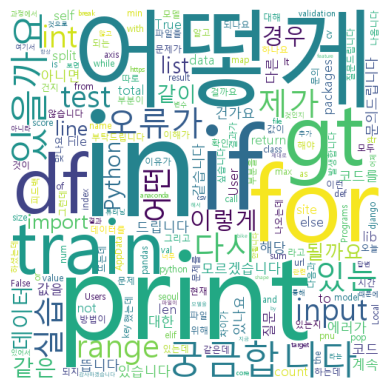

In [114]:
# 워드클라우드 만들기
## WordCloud 함수를 사용하여 각 단어의 빈도수가 저장되어 있는 cleansing_word_count 변수로 워드클라우드를 생성합니다.
## 생성하는 워드클라우드의 파라미터를 알맞게 조절 합니다.
## 워드클라우드 생성 매서드는 .generate_from_frequencies 를 사용합니다.
## <tip> 한 문의를 워드클라우드로 만들때는 generate 매서드 사용
## <tip> 각 단어와 빈도수를 가지고 워드클라우드를 만들때는 generate_from_frequencies 매서드 사용



cleansing_cloud = WordCloud(font_path = 'malgun.ttf',
                        width = 500,
                        height = 500,
                        background_color = 'white').generate_from_frequencies(cleansing_word_count)

plt.axis('off')
plt.imshow(cleansing_cloud)

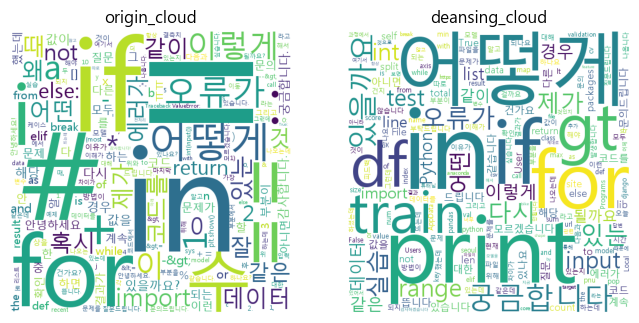

In [115]:
# 워드클라우드 비교하기
## 클렌징 전/후 워드클라우드를 한 그림으로 출력해서 어떤 차트가 더 효과적인지 비교해 보세요.

plt.figure(figsize = (8,8))

plt.subplot(1,2,1)
plt.title('origin_cloud')
plt.axis('off')
plt.imshow(origin_cloud)

plt.subplot(1,2,2)
plt.title('deansing_cloud')
plt.axis('off')
plt.imshow(cleansing_cloud)

plt.show()

### <span style="color:green;background-color:#fff5b1"> [미션6] 교육 개선점 찾기</span>

클렌징 한 워드클라우드와 단어 빈도수 카운트를 확인하여 교육생들이 어느부분을 자주 문의 하는지, 무엇을 어려워 하는지 파악 합니다.<br>
파악한 내용을 바탕으로 AIVLE스쿨이 어떤부분을 어떻게 개선하면 좋을지 시사점과 개선점을 도출하여 PPT에 정리해 보세요.

* 개선점 도출
* PPT 제작

----------
----------

### <span style="color:red;background-color:#fff5b1"> <도전미션> 문의유형 별 워드클라우드 생성 및 분야 개선점 찾기</span>

* 문의 유형별 워드클라우드를 한 그림에 표현해 주세요.
* 각 워드클라우드 위에 title 를 달아 주세요.
    * 타이틀: ['코드1', '코드2', '웹', '이론', '시스템 운영', '원격']
* <도전미션>은 아래의 가이드 코드와 셀을 무시하고 자유롭게 코드를 작성하세요.

In [116]:
data

,문의내용,문의유형,특수문자제거,단어분리,불용어제거,한글자제거
0,"inplace= True 를 사용하는 기준이 존재하는 것인지, 아니면 함수나 메소드...",코드2,inplace True 를 사용하는 기준이 존재하는 것인지 아니면 함수나 메소드에 ...,"[inplace, True, 를, 사용하는, 기준이, 존재하는, 것인지, 아니면, ...","[inplace, True, 사용하는, 기준이, 존재하는, 것인지, 아니면, 함수나...","[inplace, True, 사용하는, 기준이, 존재하는, 것인지, 아니면, 함수나..."
1,참조파일2에 대한 (yolo부분) 답안 파일이 올라오지 않은 것 같습니다!,시스템 운영,참조파일 에 대한 yolo부분 답안 파일이 올라오지 않은 것 같습니다,"[참조파일, 에, 대한, yolo부분, 답안, 파일이, 올라오지, 않은, 것, 같습니다]","[참조파일, 대한, yolo부분, 답안, 파일이, 올라오지, 않은, 것, 같습니다]","[참조파일, 대한, yolo부분, 답안, 파일이, 올라오지, 않은, 같습니다]"
2,"AICE 시험 관련하여 이렇게 1대1로 질문하는게 맞나요..? 맞다면, 질문드립니다...",시스템 운영,AICE 시험 관련하여 이렇게 대 로 질문하는게 맞나요 맞다면 질문드립니다 구글링이...,"[AICE, 시험, 관련하여, 이렇게, 대, 로, 질문하는게, 맞나요, 맞다면, 질...","[AICE, 시험, 관련하여, 이렇게, 대, 질문하는게, 맞나요, 맞다면, 질문드립...","[AICE, 시험, 관련하여, 이렇게, 질문하는게, 맞나요, 맞다면, 질문드립니다,..."
3,예제는 잘 작동한 것 같은데 채점하니 케이스 1만 성공하고 나머지가 fail이 떠 ...,코드1,예제는 잘 작동한 것 같은데 채점하니 케이스 만 성공하고 나머지가 fail이 떠 실...,"[예제는, 잘, 작동한, 것, 같은데, 채점하니, 케이스, 만, 성공하고, 나머지가...","[예제는, 작동한, 것, 같은데, 채점하니, 케이스, 만, 성공하고, 나머지가, f...","[예제는, 작동한, 같은데, 채점하니, 케이스, 성공하고, 나머지가, fail이, ..."
4,제주관광공사를 대상으로 관광지 순환 버스 솔루션을 도입하여 운전을 못하는 관광객 유...,이론,제주관광공사를 대상으로 관광지 순환 버스 솔루션을 도입하여 운전을 못하는 관광객 유...,"[제주관광공사를, 대상으로, 관광지, 순환, 버스, 솔루션을, 도입하여, 운전을, ...","[제주관광공사를, 대상으로, 관광지, 순환, 버스, 솔루션을, 도입하여, 운전을, ...","[제주관광공사를, 대상으로, 관광지, 순환, 버스, 솔루션을, 도입하여, 운전을, ..."
...,...,...,...,...,...,...
3785,"어디가 잘못되었는지 모르겠어요ㅜㅜ N = list(map(int, input()....",코드1,어디가 잘못되었는지 모르겠어요 N list map int input split n ...,"[어디가, 잘못되었는지, 모르겠어요, N, list, map, int, input,...","[어디가, 잘못되었는지, 모르겠어요, N, list, map, int, input,...","[어디가, 잘못되었는지, 모르겠어요, list, map, int, input, sp..."
3786,실습교안 102 쪽 진행중인데 이전단계에서 실습 교안대로 진행했는데 사진처럼 나옵니...,웹,실습교안 쪽 진행중인데 이전단계에서 실습 교안대로 진행했는데 사진처럼 나옵니다 실습...,"[실습교안, 쪽, 진행중인데, 이전단계에서, 실습, 교안대로, 진행했는데, 사진처럼...","[실습교안, 쪽, 진행중인데, 이전단계에서, 실습, 교안대로, 진행했는데, 사진처럼...","[실습교안, 진행중인데, 이전단계에서, 실습, 교안대로, 진행했는데, 사진처럼, 나..."
3787,ubuntu 파일 이 안 열립니다,웹,ubuntu 파일 이 안 열립니다,"[ubuntu, 파일, 이, 안, 열립니다]","[ubuntu, 파일, 안, 열립니다]","[ubuntu, 파일, 열립니다]"
3788,4. 데이터 분석 항복에 있는 6개의 문제에 대한 코드와 그래프 확인 부탁드립니다....,코드2,데이터 분석 항복에 있는 개의 문제에 대한 코드와 그래프 확인 부탁드립니다 나름 결...,"[데이터, 분석, 항복에, 있는, 개의, 문제에, 대한, 코드와, 그래프, 확인, ...","[데이터, 분석, 항복에, 있는, 개의, 문제에, 대한, 코드와, 그래프, 확인, ...","[데이터, 분석, 항복에, 있는, 개의, 문제에, 대한, 코드와, 그래프, 확인, ..."


In [140]:
# wordcloud list 생성
my_title_list = ['코드1', '코드2', '웹', '이론', '시스템 운영', '원격']
my_wordcloud = []

# 각 data['문의유형'] 별 데이터 분리하기

for my_title in my_title_list:
    type_questions = pd.Series()
    
    type_questions = data.loc[data['문의유형'] == my_title, '한글자제거']

    type_questions = type_questions.reset_index(drop = True)
    
    # 단어 리스트 생성
    cleansing_word_list = []

    for i in range(len(type_questions)):
        for j in range(len(type_questions[i])):
            cleansing_word_list.append(type_questions[i][j])

    # 전체 단어 빈도수 카운트
    cleansing_word_count = Counter(cleansing_word_list)

    # 워드클라우드 만들기
    cleansing_cloud = WordCloud(font_path = 'malgun.ttf',
                            width = 500,
                            height = 500,
                            background_color = 'white').generate_from_frequencies(cleansing_word_count)
    
    my_wordcloud.append(cleansing_cloud)


C:\Users\user\AppData\Local\Temp\ipykernel_5332\917323214.py:8: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  type_questions = pd.Series()
C:\Users\user\AppData\Local\Temp\ipykernel_5332\917323214.py:8: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  type_questions = pd.Series()
C:\Users\user\AppData\Local\Temp\ipykernel_5332\917323214.py:8: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  type_questions = pd.Series()
C:\Users\user\AppData\Local\Temp\ipykernel_5332\917323214.py:8: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  type_

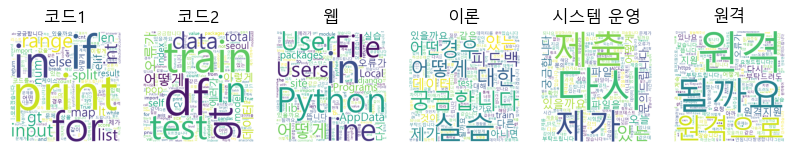

In [145]:
# WordCloud 출력
plt.figure(figsize = (10,10))

for i in range(len(my_title_list)):
    plt.subplot(1,6,i+1)
    plt.title(my_title_list[i])
    plt.axis('off')
    plt.imshow(my_wordcloud[i])


----------
----------

# 수고하셨습니다.

----------